In [2]:
import numpy as np
import os, sys
from glob import glob
from tqdm import tqdm
from time import time
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
import pandas as pd
import pickle as pkl
from hepstats.modeling import bayesian_blocks


def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)


def bayesian_blocks_mod(y):
    if len(np.unique(y))==1:
        return None
    tol = np.std(y)/100
    blocks = bayesian_blocks(y)
    diffs = np.diff(blocks)
    mask = np.ones(len(blocks),dtype=bool)
    for i,d in enumerate(diffs):
        if d<tol:
            print(f'Deleting one bin: width = {d}')
            mask[i] = False
    return blocks[mask,...]



In [3]:
with open('traces_v1.2.pkl','rb') as fh:
    chain = pkl.load(fh)

# chain = np.reshape(chain,(4,32,16000))
chain.shape

(32, 16000, 4)

In [4]:
walk_indices = []
for iw,walk in enumerate(chain):
    print(f'walker {iw}')
    fail_cond = False
    for ip in [0,1,2,3]:
        print(f'    parameter {ip}')
        print(f'        mean = {np.mean(walk[:,ip].flatten()):5.5}')
        print(f'        std = {np.std(walk[:,ip].flatten()):5.5}')
        fail_cond = fail_cond or (np.std(walk[:,ip].flatten())<0.000001)
        if fail_cond:
            print('REMOVING THIS WALKER')
            break
    if fail_cond:
        continue
    else:
        walk_indices.append(iw)

walker 0
    parameter 0
        mean = 4.9198
        std = 2.645
    parameter 1
        mean = -2.4913
        std = 2.6291
    parameter 2
        mean = 0.71696
        std = 2.6056
    parameter 3
        mean = -0.51111
        std = 2.6123
walker 1
    parameter 0
        mean = 4.8506
        std = 2.4795
    parameter 1
        mean = -2.5236
        std = 2.4845
    parameter 2
        mean = 0.68121
        std = 2.4735
    parameter 3
        mean = -0.56788
        std = 2.4729
walker 2
    parameter 0
        mean = 4.9745
        std = 2.5258
    parameter 1
        mean = -2.3562
        std = 2.5251
    parameter 2
        mean = 0.81712
        std = 2.4959
    parameter 3
        mean = -0.44882
        std = 2.4863
walker 3
    parameter 0
        mean = 2.231
        std =   0.0
REMOVING THIS WALKER
walker 4
    parameter 0
        mean = 4.8425
        std = 2.4776
    parameter 1
        mean = -2.5522
        std = 2.4869
    parameter 2
        mean = 0.63285


In [5]:
chain_cleaned = np.array(chain[walk_indices,:,:])
chain_cleaned.shape

(29, 16000, 4)

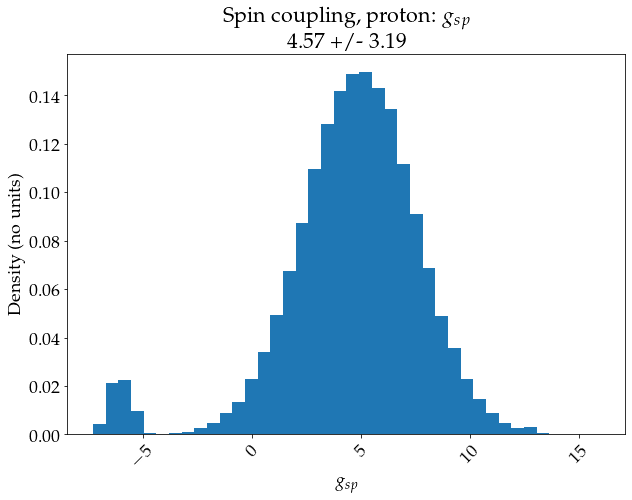

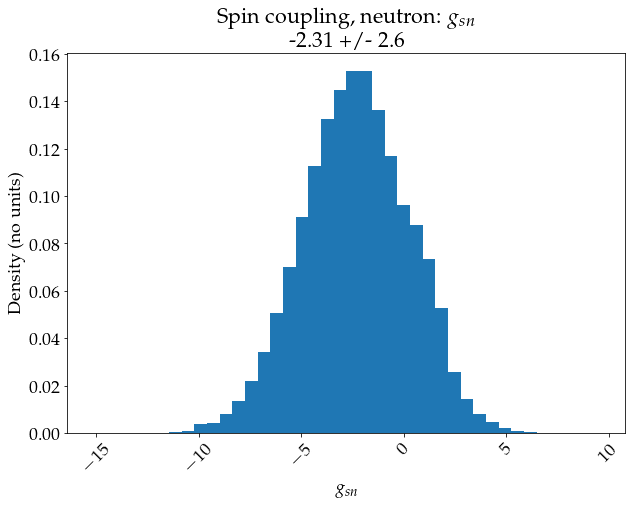

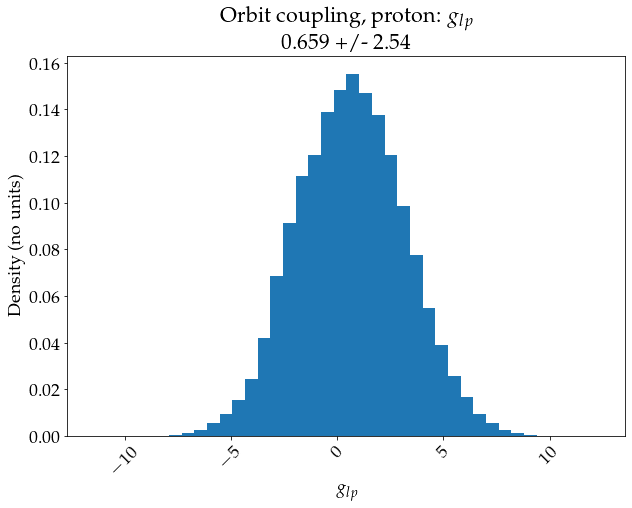

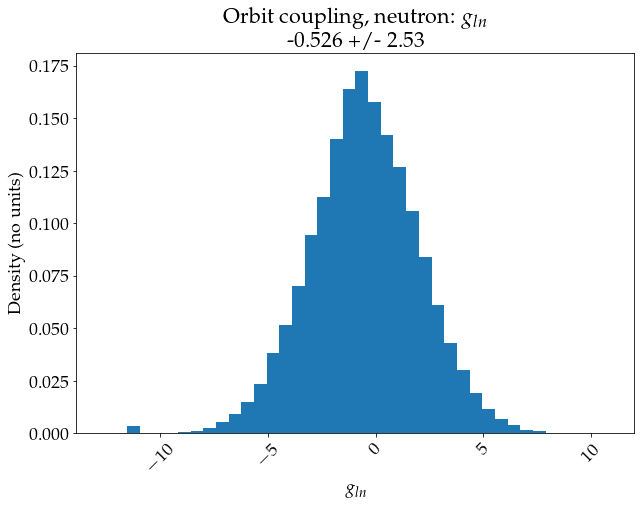

In [6]:
warmup = 400

g_sp_trace = chain_cleaned[:,warmup:,0].flatten()
g_sn_trace = chain_cleaned[:,warmup:,1].flatten()
g_lp_trace = chain_cleaned[:,warmup:,2].flatten()
g_ln_trace = chain_cleaned[:,warmup:,3].flatten()

# g_sp_trace = chain[:,warmup:,0].flatten()
# g_sn_trace = chain[:,warmup:,1].flatten()
# g_lp_trace = chain[:,warmup:,2].flatten()
# g_ln_trace = chain[:,warmup:,3].flatten()


def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 40
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')



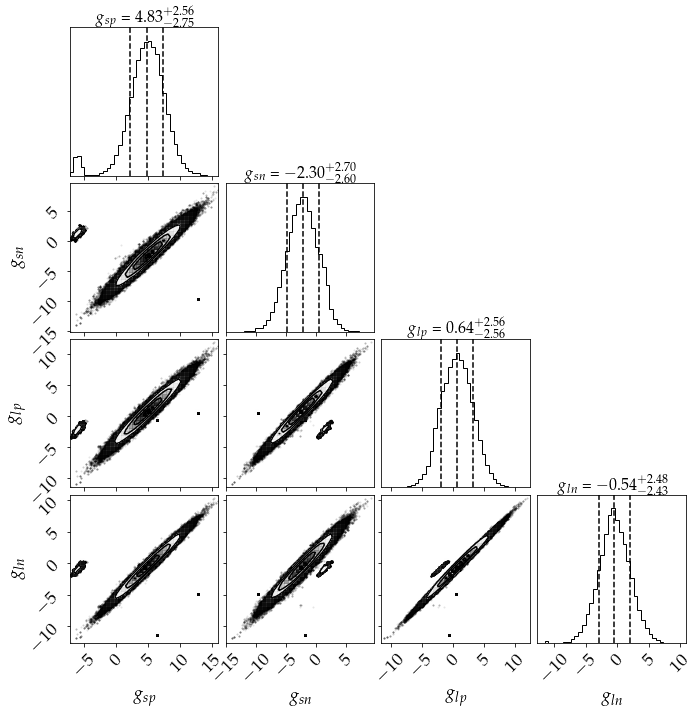

In [7]:
import corner

data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T

f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
                       quantiles=[0.16, 0.5, 0.84], bins = 40,
                       show_titles=True, title_kwargs={"fontsize": 16},
                      fig=f)

In [9]:
with open('traces_v1.3.pkl','rb') as fh:
    chain = pkl.load(fh)

# chain = np.reshape(chain,(4,32,16000))
chain.shape

walk_indices = []
for iw,walk in enumerate(chain):
    print(f'walker {iw}')
    fail_cond = False
    for ip in [0,1,2,3]:
        print(f'    parameter {ip}')
        print(f'        mean = {np.mean(walk[:,ip].flatten()):5.5}')
        print(f'        std = {np.std(walk[:,ip].flatten()):5.5}')
        fail_cond = fail_cond or (np.std(walk[:,ip].flatten())<0.000001)
        if fail_cond:
            print('REMOVING THIS WALKER')
            break
    if fail_cond:
        continue
    else:
        walk_indices.append(iw)
        
        
chain_cleaned = np.array(chain[walk_indices,:,:])
chain_cleaned.shape

warmup = 400

g_sp_trace = chain_cleaned[:,warmup:,0].flatten()
g_sn_trace = chain_cleaned[:,warmup:,1].flatten()
g_lp_trace = chain_cleaned[:,warmup:,2].flatten()
g_ln_trace = chain_cleaned[:,warmup:,3].flatten()

# g_sp_trace = chain[:,warmup:,0].flatten()
# g_sn_trace = chain[:,warmup:,1].flatten()
# g_lp_trace = chain[:,warmup:,2].flatten()
# g_ln_trace = chain[:,warmup:,3].flatten()


def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 40
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()



walker 0
    parameter 0
        mean = 5.3731
        std = 4.8801
    parameter 1
        mean = -1.9249
        std = 4.8865
    parameter 2
        mean = 1.2185
        std = 4.8621
    parameter 3
        mean = -0.048677
        std = 4.8717
walker 1
    parameter 0
        mean = 5.1834
        std = 5.1841
    parameter 1
        mean = -2.1521
        std = 5.0221
    parameter 2
        mean = 0.86651
        std = 4.8383
    parameter 3
        mean = -0.37597
        std = 4.8343
walker 2
    parameter 0
        mean = 5.102
        std = 4.8572
    parameter 1
        mean = -2.357
        std = 5.0311
    parameter 2
        mean = 0.89845
        std = 4.923
    parameter 3
        mean = -0.19952
        std = 4.8666
walker 3
    parameter 0
        mean = 4.3664
        std = 4.7056
    parameter 1
        mean = -2.951
        std = 4.7121
    parameter 2
        mean = 0.23186
        std = 4.7138
    parameter 3
        mean = -1.0132
        std = 4.7216
walker 4


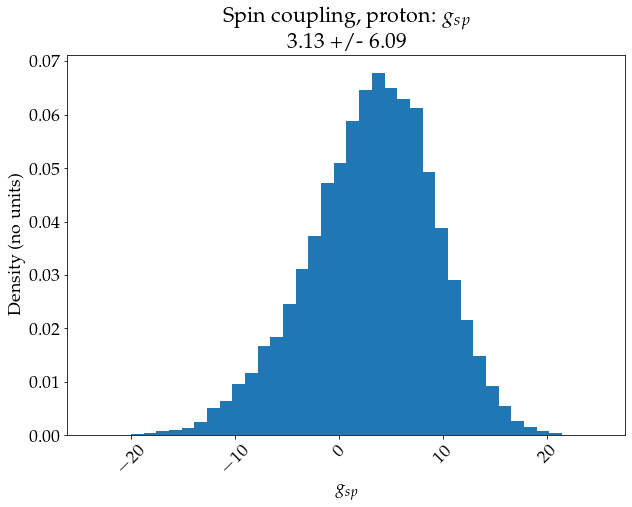

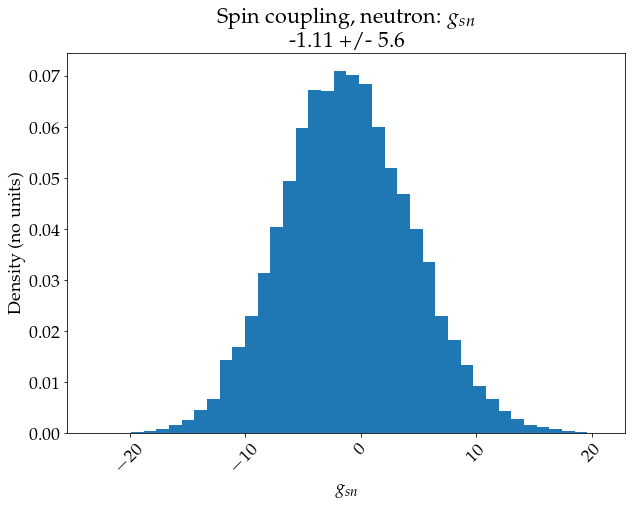

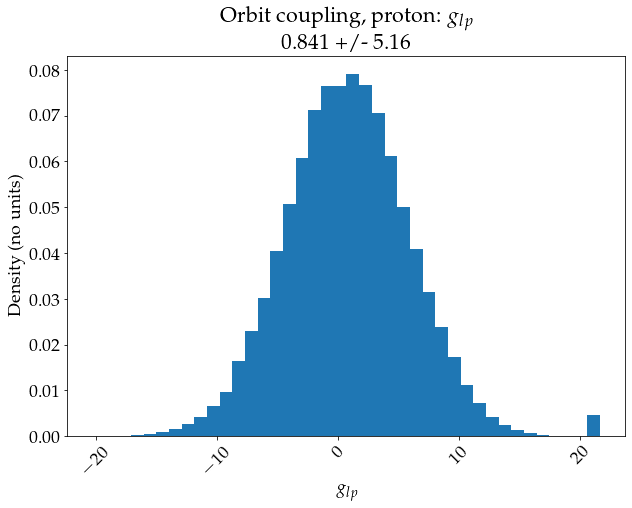

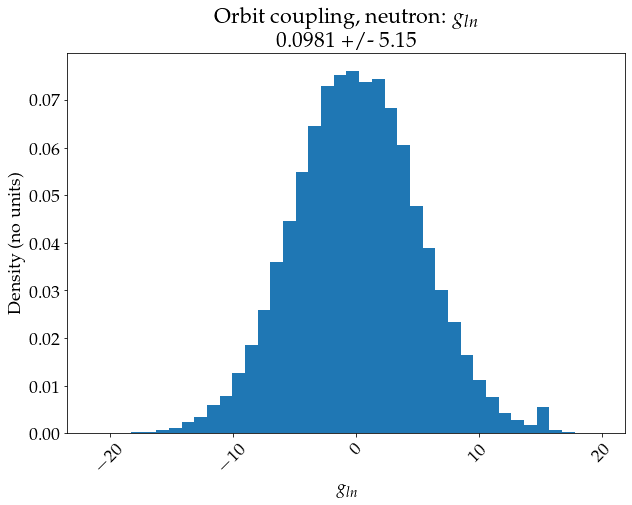

In [10]:
make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')



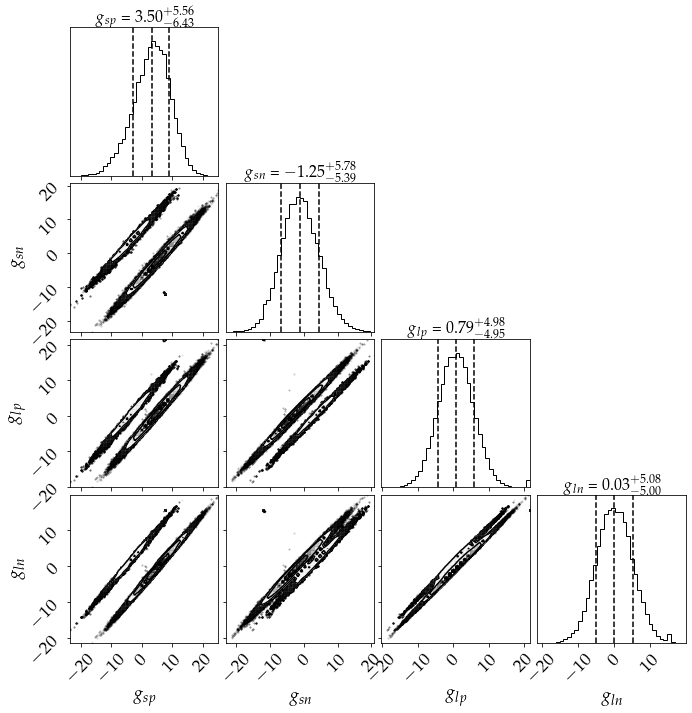

In [11]:
data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T

f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
                       quantiles=[0.16, 0.5, 0.84], bins = 40,
                       show_titles=True, title_kwargs={"fontsize": 16},
                      fig=f)